In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [ ]:

train_path = "C:\\Users\\Admin\\Desktop\\HHH\\train.csv"
test_path = "C:\\Users\\Admin\\Desktop\\HHH\\test.csv"
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [ ]:

train_df.info()
print("\nMissing Values in Train Data: ")
print(train_df.isnull().sum()[train_df.isnull().sum() > 0])

test_df.info()
print("\nMissing Values in Test Data: ")
print(test_df.isnull().sum()[test_df.isnull().sum() > 0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:

train_df = train_df.dropna(thresh=len(train_df) * 0.5, axis=1)
test_df = test_df[train_df.columns.drop("SalePrice", errors='ignore')]


In [ ]:

categorical_cols = train_df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    label_enc = LabelEncoder()
    train_df[col] = label_enc.fit_transform(train_df[col].astype(str))
    label_encoders[col] = label_enc
    
    if col in test_df.columns:
        test_df[col] = test_df[col].astype(str).apply(lambda x: x if x in label_enc.classes_ else 'unknown')
        label_enc.classes_ = np.append(label_enc.classes_, 'unknown')
        test_df[col] = label_enc.transform(test_df[col])


In [ ]:

missing_cols = set(train_df.columns) - set(test_df.columns)
for col in missing_cols:
    test_df[col] = 0

In [ ]:

test_df = test_df[train_df.drop(columns=['SalePrice']).columns]

In [ ]:

train_df = train_df.astype(float)
test_df = test_df.astype(float)


In [ ]:

Q1 = train_df.quantile(0.25)
Q3 = train_df.quantile(0.75)
IQR = Q3 - Q1
train_df = train_df[~((train_df < (Q1 - 1.5 * IQR)) | (train_df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [ ]:

train_df.fillna(train_df.median(numeric_only=True), inplace=True)
test_df.fillna(test_df.median(numeric_only=True), inplace=True)


In [ ]:

y = train_df['SalePrice']
X = train_df.drop(columns=['SalePrice'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
test_df = scaler.transform(test_df)

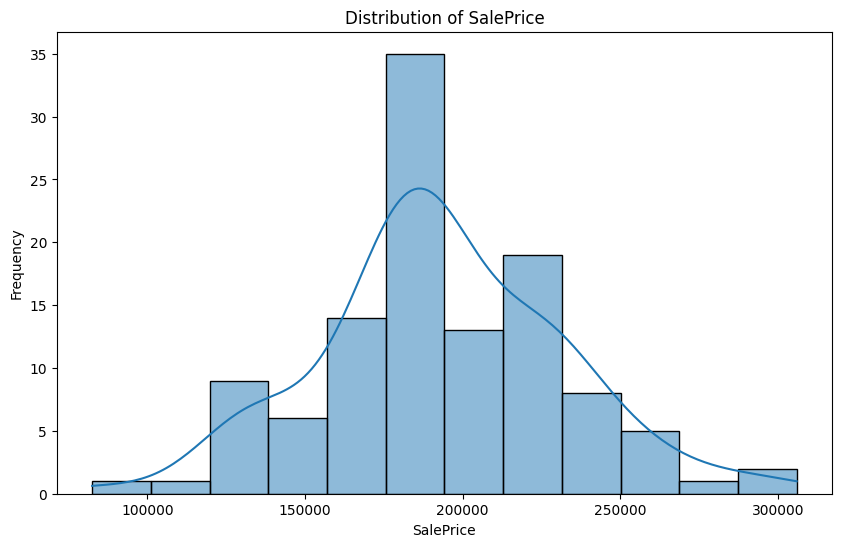

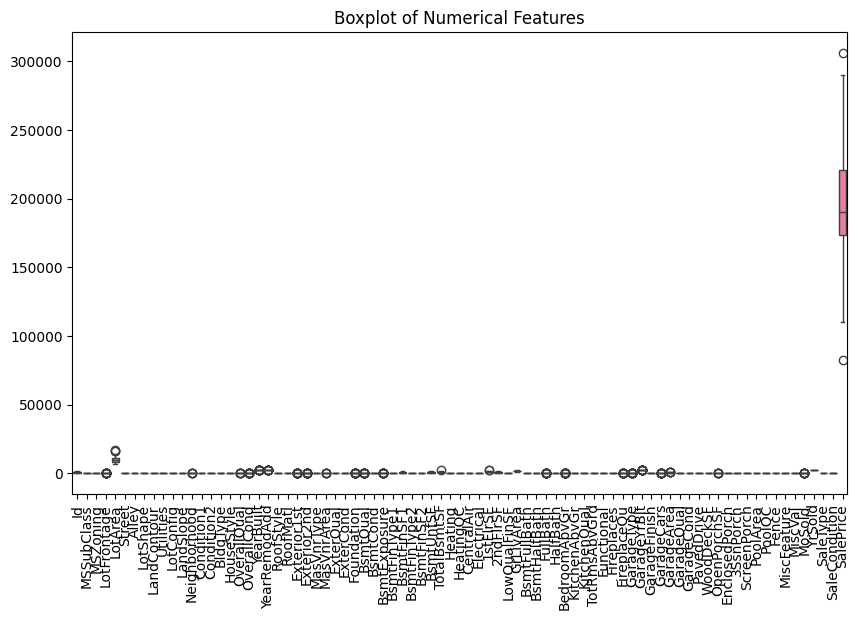

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(train_df['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df.select_dtypes(include=[np.number]))
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=90)
plt.show()

In [ ]:

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Linear Regression R² Score:", r2_score(y_test, y_pred_lr))
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lr))

y_test_pred_lr = lr.predict(test_df)

Linear Regression R² Score: 0.6912312010652611
Linear Regression MSE: 501748726.25869936


In [ ]:

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Regressor R² Score:", r2_score(y_test, y_pred_dt))
print("Decision Tree Regressor MSE:", mean_squared_error(y_test, y_pred_dt))

y_test_pred_dt = dt.predict(test_df)

Decision Tree Regressor R² Score: 0.4265996807534532
Decision Tree Regressor MSE: 931774456.5217391


In [ ]:

y_class = (y > y.median()).astype(int)  
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)

In [ ]:

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))

y_test_pred_log = log_reg.predict(test_df)

Logistic Regression Accuracy: 0.9565217391304348


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

y_test_pred_rf = rf.predict(test_df)

Random Forest Accuracy: 0.8695652173913043


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:

print("Best Regression Model:", "Linear Regression" if r2_score(y_test, y_pred_lr) > r2_score(y_test, y_pred_dt) else "Decision Tree Regressor")
print("Best Classification Model:", "Logistic Regression" if accuracy_score(y_test, y_pred_log) > accuracy_score(y_test, y_pred_rf) else "Random Forest")

Best Regression Model: Decision Tree Regressor
Best Classification Model: Logistic Regression


In [ ]:
import os
import joblib
from sklearn.tree import DecisionTreeRegressor 


model = DecisionTreeRegressor()
model.fit(X_train, y_train) 


os.makedirs("model", exist_ok=True)


joblib.dump(scaler, "model/scaler.pkl")  
joblib.dump(label_encoders, "model/label_encoders.pkl")  
joblib.dump(train_df.drop(columns=['SalePrice']).columns.tolist(), "model/feature_columns.pkl")  

joblib.dump(model, "model/model.pkl")  


['model/model.pkl']